# Introduction to Neural Networks

## What is a Neural Network?
A **Neural Network (NN)** is a **computational model** inspired by the human brain.  
It consists of **neurons (nodes)** that process and pass information.

**Used for:**  
- Image recognition  
- Speech processing  
- Classification & regression tasks  
- Natural Language Processing (NLP)  

## What is a Neuron?
A **neuron** is the fundamental unit of a neural network.  
It takes multiple inputs, applies **weights and biases**, and produces an output using an **activation function**. <br/>
<img src="img/neuron.png" alt="drawing" width="500"/>

### **Mathematical Representation**
Each neuron applies:  
$y = \sigma(Wx + b)$
where:
- W = Weights (importance of each input)
- x = Inputs
- b = Bias (adjusts the output)
- $\sigma$ = Activation function (e.g., Sigmoid, ReLU)

<img src="img/neuron-math.webp" alt="drawing" width="600"/>

### **Weights and Biases**
These parameters are what we update when we talk about "training" a model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. Basically, it makes the model more flexible, since you can "move" the activation function around.

### **Activation function**
Are crucial because they introduce non-linearity, allowing the model to learn complex patterns. Without them, the network would behave like a simple linear regression model, no matter how many layers it has!

## Basic Structure of a Neural Network
A typical **Neural Network** is organized into three parts:
- **Input Layer** - Takes input features (e.g., pixels, numerical data)
- **Hidden Layers** - Apply transformations using **weights & biases**
- **Output Layer** - Produces the final prediction

<img src="img/multi-layer-nn.png" alt="drawing" width="500"/>

In [ ]:
import numpy as np

# 

import numpy.typing as npt
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed for reproducibility
np.random.seed(9)

In [150]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

## What is XOR?
**XOR (Exclusive OR)** is a simple binary classification problem:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

**Linear models (like Logistic Regression) fail** because XOR is **not linearly separable**.  
**Neural Networks can learn** nonlinear decision boundaries to solve XOR! 

In [151]:
# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

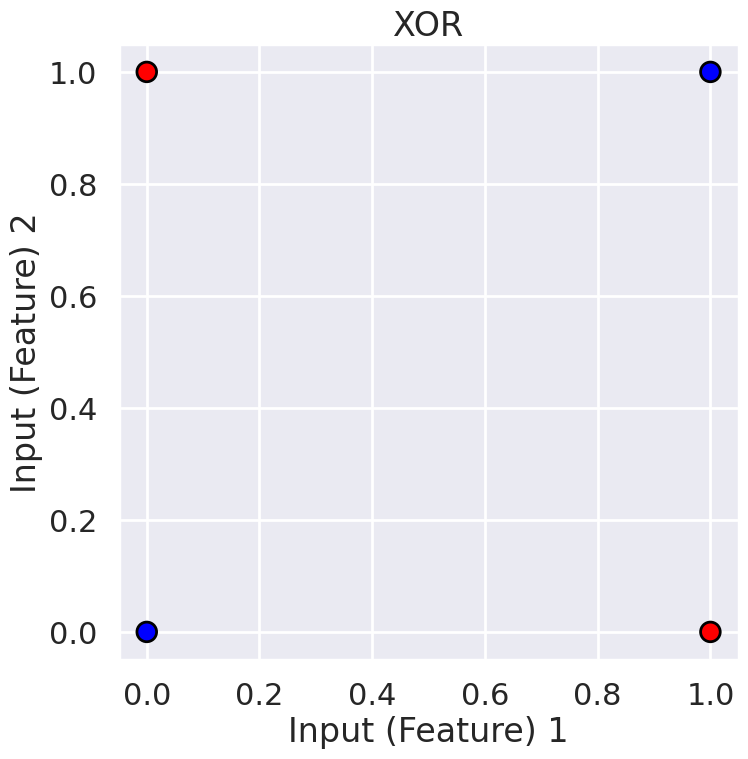

In [152]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k", s=200)

plt.xlabel("Input (Feature) 1")
plt.ylabel("Input (Feature) 2")
plt.title("XOR")
plt.grid(True)

plt.show()

In [153]:
def sigmoid(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return 1 / (1 + np.exp(-x))

def derivate_sigmoid(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return x * (1 - x)

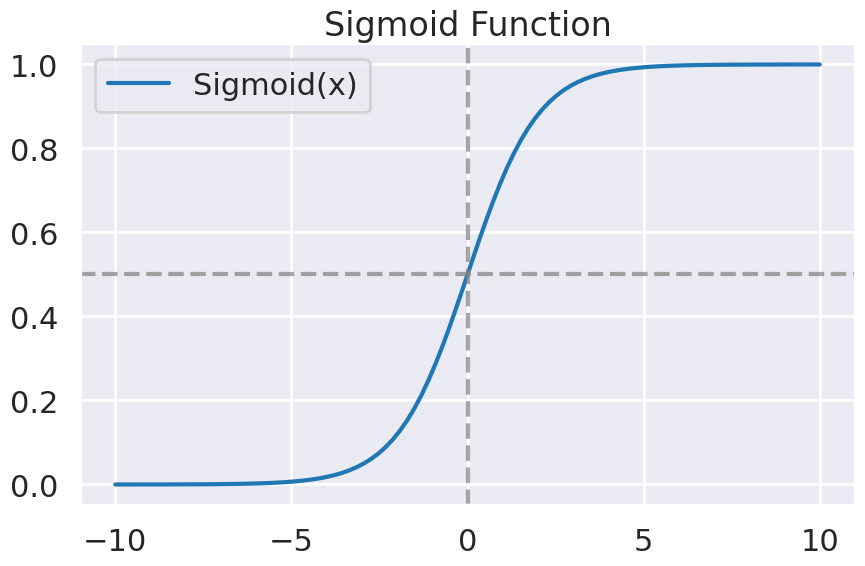

In [ ]:
# generate x values
x = np.linspace(-10, 10, 100)

# calculate sigmoid
y_sigmoid = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid(x)')
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)  # midpoint
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)    # center
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
class Neuron:
    def __init__(self, input_size: int):
        # initialize weights and bias
        self.weights = np.random.uniform(size=input_size)
        self.bias = np.random.uniform()
    
    def activate(self, inputs: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        self.inputs = inputs # needed for backpropagation
        # calculate the neuron's output
        # self.output = sigmoid((inputs @ self.weights) + self.bias)
        self.output = sigmoid(np.dot(inputs, self.weights) + self.bias)
        return self.output
    
    def update_weights(self, delta: float, learning_rate: float):
        self.weights += learning_rate * delta * self.inputs
        self.bias += learning_rate * delta

class Layer:
    def __init__(self, num_neurons: int, inputs_per_neuron: int):
        self.neurons = [Neuron(inputs_per_neuron) for _ in range(num_neurons)]

    def forward(self, inputs: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        outputs = np.array([neuron.activate(inputs) for neuron in self.neurons])
        return outputs

    def backward(self, errors: npt.NDArray[np.float64], learning_rate: float) -> npt.NDArray[np.float64]:
        # update weights and biases
        deltas = []
        for i, neuron in enumerate(self.neurons):
            # MSE derivative * sigmoid derivative
            delta = errors[i] * derivate_sigmoid(neuron.output)
            # weights += learning rate * delta * neuron inputs
            neuron.update_weights(delta, learning_rate)
            deltas.append(delta)

        return np.dot(np.array([neuron.weights for neuron in self.neurons]).T, deltas)

### Training
Training a neural network from scratch involves teaching it to make better predictions by adjusting its internal parameters (weights and biases) using training data.

#### Epoch
An epoch is one full pass through the entire training dataset. During training, we often go through many epochs so the network can learn patterns more effectively.

#### Loss Function
The loss function measures how far the network’s predictions are from the actual values (ground truth). For XOR, we typically use Mean Squared Error (MSE). Lower loss means better performance. Our goal is to minimize the loss as much as possible.

#### Gradient Descent

*Gradient Descent is the optimization algorithm that utilizes the gradients calculated through backpropagation to update the network’s weights and biases.* It does this by moving in the direction that reduces the loss the most — like walking downhill toward the lowest point.

#### Back Propagation
Backpropagation is how we compute the gradients (slopes) of the loss with respect to each weight and bias. It works by:

- Calculating the error at the output layer,
- Propagating that error backward through the network,
- Using the gradients to update the parameters via gradient descent.


The primary goal of training a machine learning model is to find the set of weights (and biases) that minimize a defined loss function. The loss function quantifies how poorly the model is performing on the training data.

[3Blue1Brown - Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8) <br/>
[Brilliant.org - Backpropagation](https://brilliant.org/wiki/backpropagation/)

In [ ]:
class NeuralNetwork:
    def __init__(self, layers_sizes: list[int]):
        self.layers = [
            Layer(layers_sizes[i + 1], layers_sizes[i]) for i in range(len(layers_sizes) - 1)
        ]
    
    def train(self, inputs: npt.NDArray[np.float64], targets: npt.NDArray[np.float64], epochs: int, learning_rate: float):
        for epoch in range(epochs):
            total_error = 0

            for x, y in zip(inputs, targets):
                # Iteration: 0 x: [0 0]; y: 0
                # Iteration: 1 x: [0 1]; y: 1
                # Iteration: 2 x: [1 0]; y: 1
                # Iteration: 3 x: [1 1]; y: 0
                layer_output = x

                for layer in self.layers:
                    # update layer output
                    layer_output = layer.forward(layer_output)

                # calculate error (known also as residual)
                error = y - layer_output

                # calculate total error (MSE - Mean Squared Error)
                total_error += np.sum(error ** 2)

                # backpropagate error
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            # print MSE
            if (epoch + 1) % 1000 == 0:
                mse = total_error / len(inputs)
                print(f"Epoch: {epoch + 1}, MSE: {mse}")

    def predict(self, inputs: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        output = inputs
        for layer in self.layers:
            output = layer.forward(output)
        return output

In [157]:
def classify(nn: NeuralNetwork, datapoint: npt.NDArray[np.float64]) -> int:
    if nn.predict(datapoint)[0] >= 0.5:
        return 1

    return 0

In [ ]:
def plot_decision_boundary(nn: NeuralNetwork, X, y):
    # setting plot properties like size, theme and axis limits
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 10))

    plt.axis('scaled')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    colors = {
        0: "ro",
        1: "go"
    }

    for i in range(len(X)):
        plt.plot([X[i][0]],
                 [X[i][1]],
                 colors[y[i]],
                 markersize=20)

    x_range = np.arange(-0.1, 1.1, 0.01)
    y_range = np.arange(-0.1, 1.1, 0.01)

    # creating a mesh to plot decision boundary
    xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
    Z = np.array([[classify(nn, [x, y]) for x in x_range] for y in y_range])

    # using the contourf function to create the plot
    plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
    plt.show()

def plot_decision_boundary_3D(nn: NeuralNetwork, X, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # define a finer grid
    x_range = np.linspace(-0.1, 1.1, 100)  # increased resolution
    y_range = np.linspace(-0.1, 1.1, 100)
    xx, yy = np.meshgrid(x_range, y_range)

    # compute neural network output for each point in the meshgrid
    Z = np.array([[nn.predict([x, y])[0] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xx, yy)])

    # plot surface with better color and transparency
    surf = ax.plot_surface(xx, yy, Z, cmap="coolwarm", alpha=0.7, edgecolor='none')

    # add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # scatter actual data points (XOR)
    for i in range(len(X)):
        ax.scatter(X[i, 0], X[i, 1], y[i], color="black", s=100, edgecolors="k", label="Data Points" if i == 0 else "")

    ax.set_xlabel("Feature 1", labelpad=20)
    ax.set_ylabel("Feature 2", labelpad=20)
    ax.set_zlabel("NN Output", labelpad=20)
    plt.show()

In [159]:
# create and train the neural network
layers = [2, 2, 1]

nn = NeuralNetwork(layers_sizes=layers)
nn.train(X, y, epochs=5000, learning_rate=0.2)

Epoch: 1000, MSE: 0.2559780857327473
Epoch: 2000, MSE: 0.2470158302100438
Epoch: 3000, MSE: 0.1660592179382273
Epoch: 4000, MSE: 0.017598428903517177
Epoch: 5000, MSE: 0.0058637973039422295


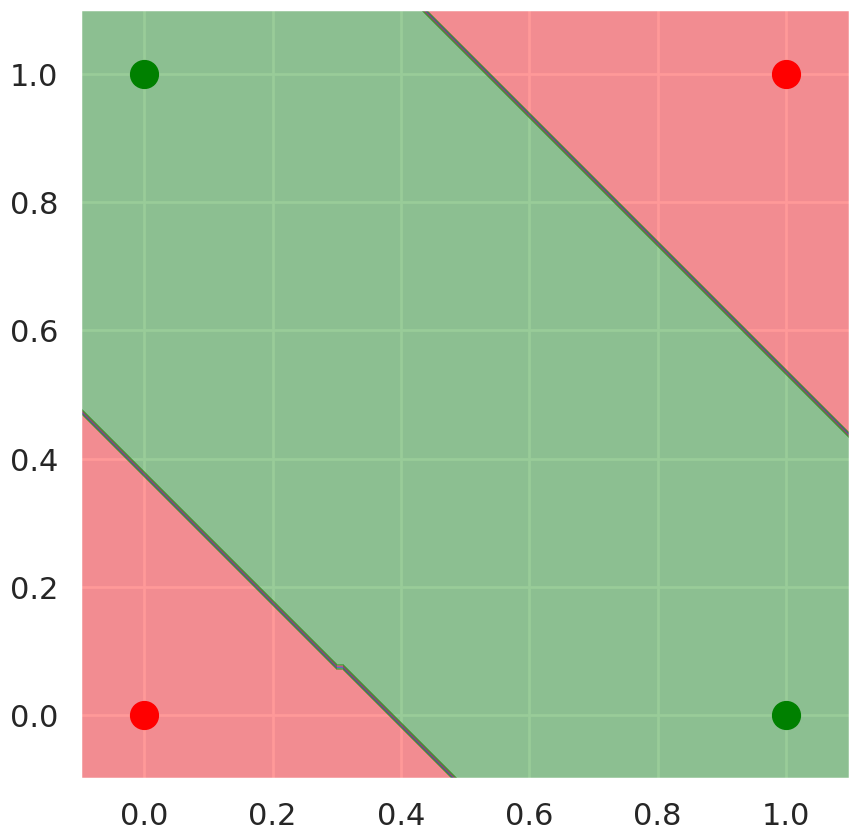

In [160]:
plot_decision_boundary(nn, X, y)

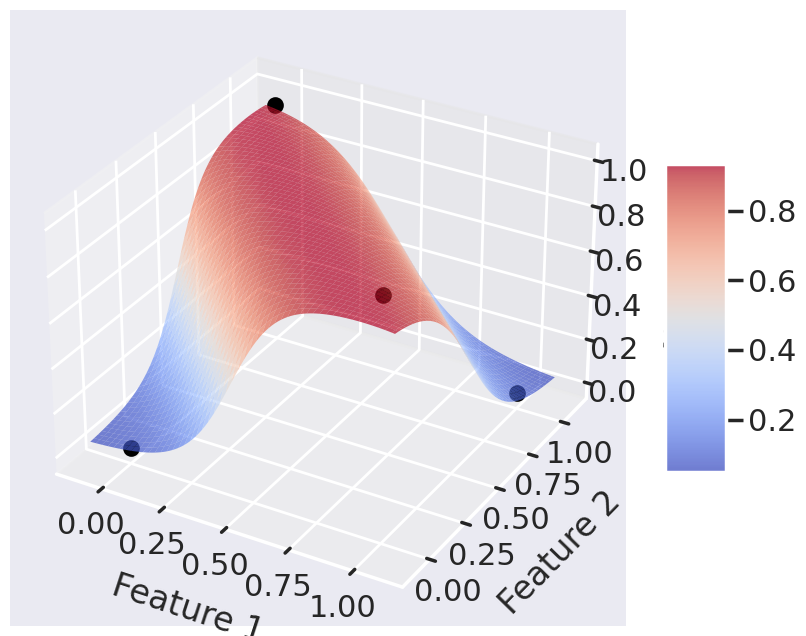

In [161]:
plot_decision_boundary_3D(nn, X, y)

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.Tensor([0,1,1,0]).reshape(-1,1)

# define the neural network model
class XORNeuralNetwork(nn.Module):
    def __init__(self):
        super(XORNeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(2, 2)  # 2 input features to 2 hidden neurons
        self.output_layer = nn.Linear(2, 1)  # 2 hidden neurons to 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.hidden_layer(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

# create the neural network
model = XORNeuralNetwork()

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

# training the neural network
epochs = 5000
loss_history = []

for epoch in range(epochs):
    for input, target in zip(X, y):
        optimizer.zero_grad() # zero the gradient buffers
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step() # update weights
    
    # print average loss
    if epoch % 1000 == 0:
        print("Epoch {: >8} Loss: {}".format(epoch, loss.data.numpy()))

# test the trained model (disable gradient calculation)
with torch.no_grad():
    test_outputs = model(X)
    predictions = (test_outputs > 0.5).float()  # probabilities to binary predictions
    print(f'Predictions: {predictions.numpy().flatten()}')

Epoch        0 Loss: 0.17460262775421143
Epoch     1000 Loss: 0.08163676410913467
Epoch     2000 Loss: 0.004592084791511297
Epoch     3000 Loss: 0.002050567651167512
Epoch     4000 Loss: 0.00128598278388381
Predictions: [0. 1. 1. 0.]


## **Fun fact** [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
MLP with one hidden layer (with a sufficient number of neurons) can approximate any continuous function of the inputs arbitrarily well. With two hidden layers, it can even approximate discontinuous functions.